Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
import numpy as np
import matplotlib.pyplot as plt
max_temp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
months=np.arange(12)

In [4]:
plt.figure(figsize=(4,3))

<Figure size 288x216 with 0 Axes>

<Figure size 288x216 with 0 Axes>

Text(0, 0.5, 'Min and Max temperature')

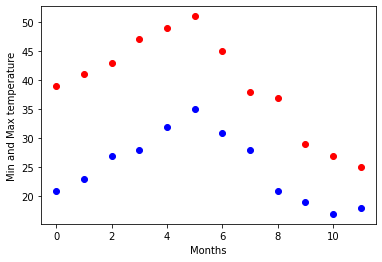

In [7]:
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Months')
plt.ylabel('Min and Max temperature')

In [8]:
from scipy import optimize
def temp(times,avg,ampl,time_offset):
    return(avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))
res_max,cov_max=optimize.curve_fit(temp,months,max_temp,[20,10,0]
)
res_min,cov_min=optimize.curve_fit(temp,months,min_temp,[-40,20,0])

In [9]:
days=np.linspace(0,12,365)

Text(0, 0.5, 'Temperature')

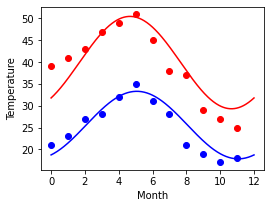

In [10]:
plt.figure(figsize=(4,3))
plt.plot(months,max_temp,'ro')
plt.plot(days,temp(days,*res_max),'r-')
plt.plot(months,min_temp,'bo')
plt.plot(days,temp(days,*res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [13]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [14]:
titanic=pd.read_csv(url)

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
s=titanic['sex'].astype('category')

In [17]:
s=s.cat.codes

In [18]:
s.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

(-1.1131210684116186,
 1.1006248129493268,
 -1.1156745899219302,
 1.1088629231702263)

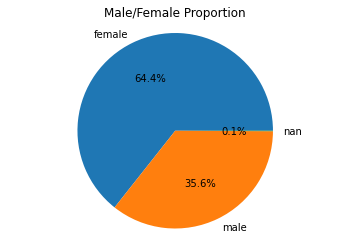

In [21]:
plt.pie(s.value_counts(),labels=titanic['sex'].unique(),autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')


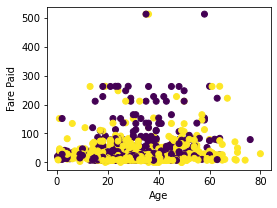

In [24]:
plt.figure(figsize=(4,3))
plt.scatter(titanic['age'], titanic['fare'], c = s)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()
